<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment05/assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05. Logistic regression for a binary classification - 20145822 김영현
---
## 1. Plot the training data

## 2. Plot the estimated parameters

## 3.  Plot the training error

## 4. Plot the obtained classifier

100000 0.704444274110096 1.4060152939876027
200000 0.26812023156323456 0.28802543577132544
300000 0.2376585488110843 0.24468741348928183
400000 0.23736221484865527 0.24428834227261048
500000 0.2373585702508854 0.24428343731523372
600000 0.23735852530659118 0.24428337682897802
700000 0.23735852475343183 0.24428337608453363
800000 0.23735852475343183 0.24428337608453363
900000 0.23735852475343183 0.24428337608453363
1000000 0.23735852475343183 0.24428337608453363
1002800 0.2064799898438051 0.20647998884396462


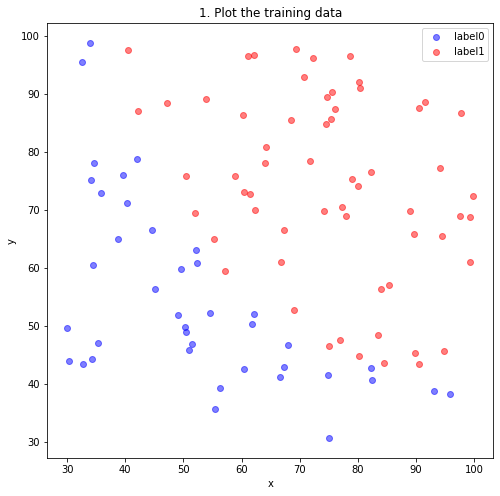

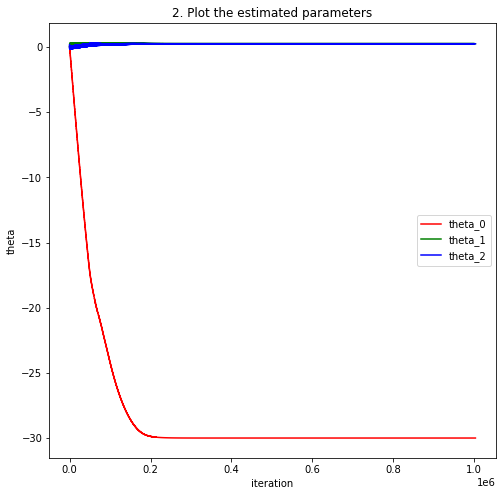

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import math

# data input
data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data05/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

# function definition
# calculate z value
def calc_z(theta_0, theta_1, theta_2, x, y):
  z= []
  for i in range(len(x)):
    z.append(theta_0 + (theta_1 * x[i]) + (theta_2 * y[i]))
  return z
# calculate sigmoid value
def calc_sigmoid(z):
  sigmoid = []
  for i in range(len(z)):
    sigmoid.append(1/(1+math.exp(-z[i])))
  return sigmoid
# calculate objective function value
def ob_func(label, sigmoid):
  sum = 0
  for i in range(len(label)):
    oprd_left = (-1*label[i]) * math.log(sigmoid[i])
    oprd_right = (1-label[i]) * math.log(1-sigmoid[i])
    sum += oprd_left - oprd_right
  return sum/len(label)
# calculate next theta value
def theta_desc(theta, alpha, x, y, label, sigmoid, key):
  sum = 0
  for i in range(len(sigmoid)):
    if key == 0:
      sum += sigmoid[i] - label[i]
    elif key == 1:
      sum += (sigmoid[i] - label[i]) * x[i]
    elif key == 2:
      sum += (sigmoid[i] - label[i]) * y[i]
  return theta - (alpha * sum / len(sigmoid))

# variable initialization
theta_0 = 0.01
theta_1 = 0.01
theta_2 = 0.01
alpha = 0.005
iteration = 0
# variable list for store iteration data
ob_func_list = []
theta_0_list = []
theta_1_list = []
theta_2_list = []
# iteration
while True:
  # calculate each value for this iteration
  z_list = calc_z(theta_0, theta_1, theta_2, x, y)
  sigmoid_list = calc_sigmoid(z_list)
  ob_func_val = ob_func(label, sigmoid_list)
  # store each value
  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_2_list.append(theta_2)
  ob_func_list.append(ob_func_val)


  # escape rule
  if iteration > 0:
    if iteration % 100000 == 0:
      print(iteration, ob_func_list[iteration-1], ob_func_val)
    if iteration == 1000000:
      alpha = 0.00001
    if abs(ob_func_list[iteration-1] - ob_func_val) < 0.000000001:
      print(iteration, ob_func_list[iteration-1], ob_func_val)
      break
  # update next theta values & iteration value
  theta_0 = theta_desc(theta_0, alpha, x, y, label, sigmoid_list, 0)
  theta_1 = theta_desc(theta_1, alpha, x, y, label, sigmoid_list, 1)
  theta_2 = theta_desc(theta_2, alpha, x, y, label, sigmoid_list, 2)
  iteration += 1

iterations = []
for i in range(iteration+1):
  iterations.append(i)

# 1. Plot the training data
# plot the training data points (x,y) with their labels
# blue for label 0 and red for label 1
plt.figure(1,figsize=(8, 8))
plt.title('1. Plot the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_label0, y_label0, alpha=0.5, c='b', label='label0')
plt.scatter(x_label1, y_label1, alpha=0.5, c='r', label='label1')
plt.legend()

# 2. Plot the estimated parameters
# plot the thetas at every iteration of gradient descent until convergence
# (θ0,θ1,θ2) should be red, green, blue, respectively
plt.figure(2,figsize=(8, 8))
plt.title('2. Plot the estimated parameters')
plt.xlabel('iteration')
plt.ylabel('theta')
plt.plot(iterations, theta_0_list, c='r', label='theta_0')
plt.plot(iterations, theta_1_list, c='g', label='theta_1')
plt.plot(iterations, theta_2_list, c='b', label='theta_2')
plt.legend()

plt.show()
